In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_df = pd.read_csv('F:/Coursera/2022/coursera_marketing_analytics/course2/inu_neko_orderline_clean.csv')
order_df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [3]:
# how many years does the order data cover? - All 2021
order_df['trans_year'].value_counts()

2021    38223
Name: trans_year, dtype: int64

In [4]:
# how many months does the order data cover? - 2021-01 to 2021-06
order_df['trans_month'].value_counts()

6    13256
5     9858
4     6884
3     4645
2     2374
1     1206
Name: trans_month, dtype: int64

In [131]:
# Create a date variable
mdy = order_df[['trans_day', 'trans_month', 'trans_year']].rename(columns = {'trans_day': 'day', 'trans_month': 'month', 'trans_year': 'year'})
order_df['trans_date'] = pd.to_datetime(mdy, dayfirst = True)
order_df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales,trans_date
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99,2021-01-01
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95,2021-01-01
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99,2021-01-01
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90,2021-01-01
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95,2021-01-01


In [132]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trans_id          38223 non-null  int64         
 1   prod_upc          38223 non-null  int64         
 2   cust_id           38223 non-null  int64         
 3   trans_timestamp   38223 non-null  object        
 4   trans_year        38223 non-null  int64         
 5   trans_month       38223 non-null  int64         
 6   trans_day         38223 non-null  int64         
 7   trans_hour        38223 non-null  int64         
 8   trans_quantity    38223 non-null  int64         
 9   cust_age          38223 non-null  int64         
 10  cust_state        38223 non-null  object        
 11  prod_price        38223 non-null  float64       
 12  prod_title        38223 non-null  object        
 13  prod_category     38223 non-null  object        
 14  prod_animal_type  3822

## Sales Trend

Text(0.5, 0, 'Months')

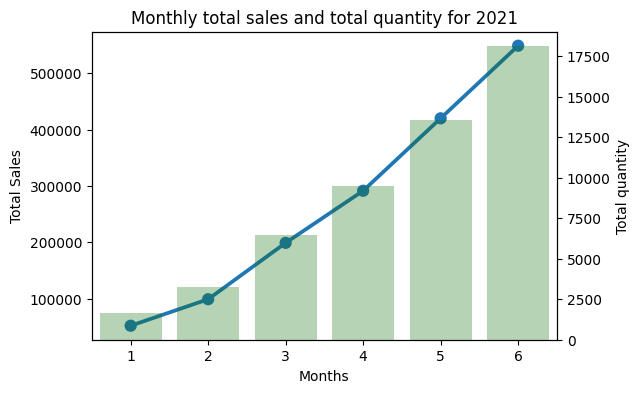

In [202]:
grouped_df = order_df.groupby('trans_month', as_index=False)
# Total sales change over the 6 months
grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
plt.figure(figsize = (6, 4))
sns.pointplot(data = grouped_sales, x = 'trans_month', y = 'total_sales')
plt.title('Monthly total sales and total quantity for 2021')
plt.ylabel('Total Sales')
plt.xlabel('Months')
# Total quantities of item sold over the 6 months
ax2 = plt.twinx()
sns.barplot(data = grouped_sales, x = 'trans_month', y = 'trans_quantity', color = 'green', ax = ax2, alpha = 0.3)
plt.ylabel('Total quantity')
plt.xlabel('Months')

## Customer Demographics 

1. What's the distribution of customer's age? Does it change over the 6 months?

To answer this question, we need to dedup the transaction data by customer id, transaction month.

In [134]:
unique_cust_age_df = order_df[['cust_id', 'trans_month', 'cust_age']]
unique_cust_age_df = unique_cust_age_df[~unique_cust_age_df.duplicated()]
# No duplicates - that means one cust_id has unique age - Check!
unique_cust_age_df.duplicated(subset = ['cust_id', 'trans_month'], keep='first').sum()

0

Next step, we can plot the distribution of customers' age using boxplot over time.

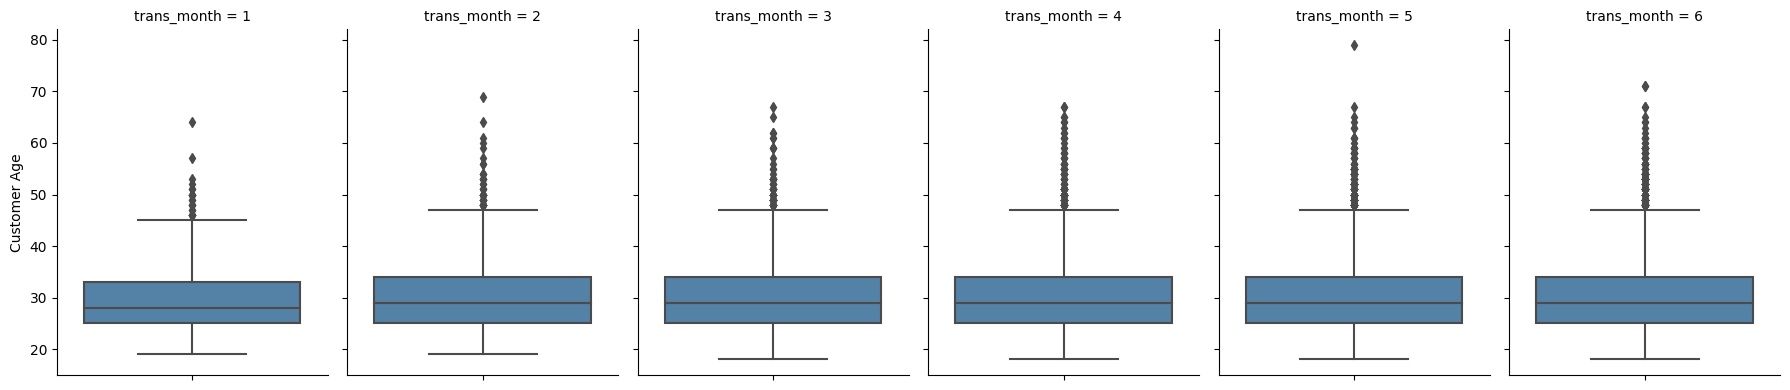

In [203]:
# Are there any changes in the user demographics over the 6 months?
# User's age distribution - no difference by animal type over the 6 months
g = sns.FacetGrid(unique_cust_age_df, col = 'trans_month')
g.fig.set_size_inches((18, 4))
g.map_dataframe(sns.boxplot, y = 'cust_age', color = 'steelblue')
g.set_ylabels('Customer Age')

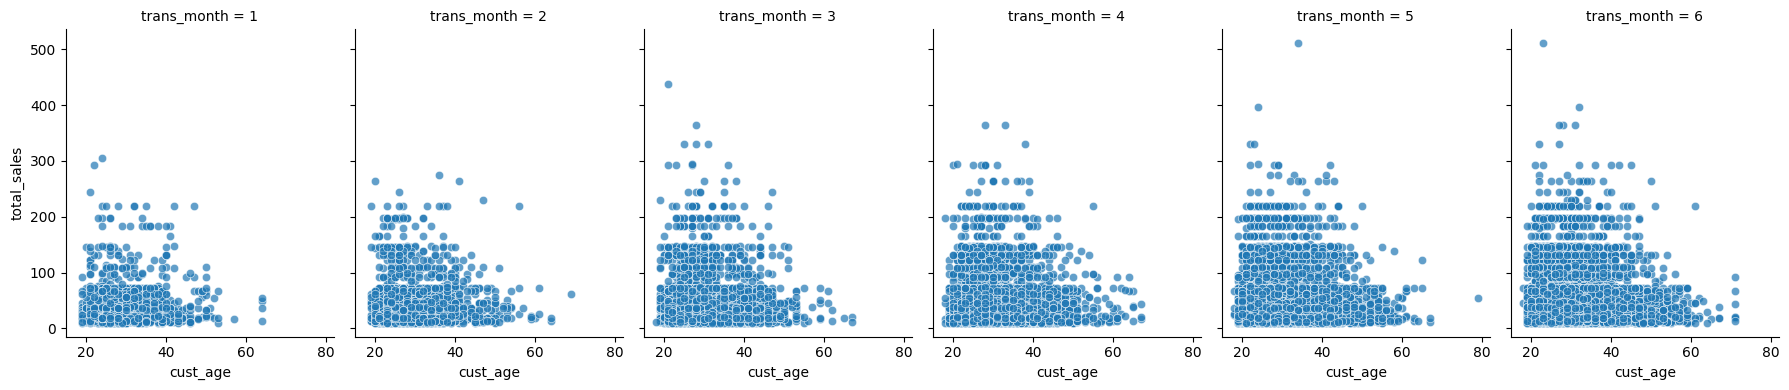

In [217]:
# Any correlations between age and total sales?
g = sns.FacetGrid(order_df, col = 'trans_month')
g.fig.set_size_inches((18, 4))
g.map_dataframe(sns.scatterplot, x = 'cust_age', y = 'total_sales', alpha = 0.7)

In [221]:
order_df.groupby('trans_month')[['cust_age', 'total_sales']].corr()

cust_age  total_sales
trans_month                                   
1           cust_age     1.000000     0.003747
            total_sales  0.003747     1.000000
2           cust_age     1.000000    -0.023644
            total_sales -0.023644     1.000000
3           cust_age     1.000000     0.007638
            total_sales  0.007638     1.000000
4           cust_age     1.000000    -0.008494
            total_sales -0.008494     1.000000
5           cust_age     1.000000     0.001647
            total_sales  0.001647     1.000000
6           cust_age     1.000000    -0.000826
            total_sales -0.000826     1.000000

__Summary__: 

As can be seen from the plots and table above:
* There's no significant distribution change for customers' age. The medium customer age is around 30. 
* There seems no correlation between customer age and total sales.

2. What's the distribution of customers' location? Does it change over the 6 months?

To answer this question, we need to dedup by customer id, transaction month and customer state.

In [136]:
unique_cust_state_df = order_df[['cust_id', 'trans_month', 'cust_state']]
unique_cust_state_df = unique_cust_state_df[~unique_cust_state_df.duplicated()]

print(unique_cust_state_df[unique_cust_state_df.duplicated(subset = ['cust_id', 'trans_month'], keep='first')].sort_values(by = ['cust_id', 'trans_month']))
print("\n")
print(unique_cust_state_df[unique_cust_state_df.duplicated(subset = ['cust_id', 'trans_month'], keep='last')].sort_values(by = ['cust_id', 'trans_month']))

      cust_id  trans_month      cust_state
201   1001014            1  North Carolina
314   1001021            1      California
1113  1001024            1      California
135   1001027            1         Indiana
72    1001040            1            Ohio


    cust_id  trans_month    cust_state
15  1001014            1    New Jersey
14  1001021            1  Pennsylvania
9   1001024            1   Connecticut
30  1001027            1  Pennsylvania
35  1001040            1      New York


We noticed that one customer may purchase the items from different state. To see the distribution, we will treat that these clients as if they come from different states.

In [137]:
groupby_df = unique_cust_state_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)['cust_id'].count()
groupby_df2 = unique_cust_state_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)['cust_id'].nunique()
(groupby_df2 != groupby_df).sum()

trans_month    0
cust_state     0
cust_id        0
dtype: int64

Note that in this case, `count()` and `nunique()` will generate the same results.

We can use bar chart or line chart to display the findings.

Text(0.5, 0.98, 'Number of Customers by State over 6 months')

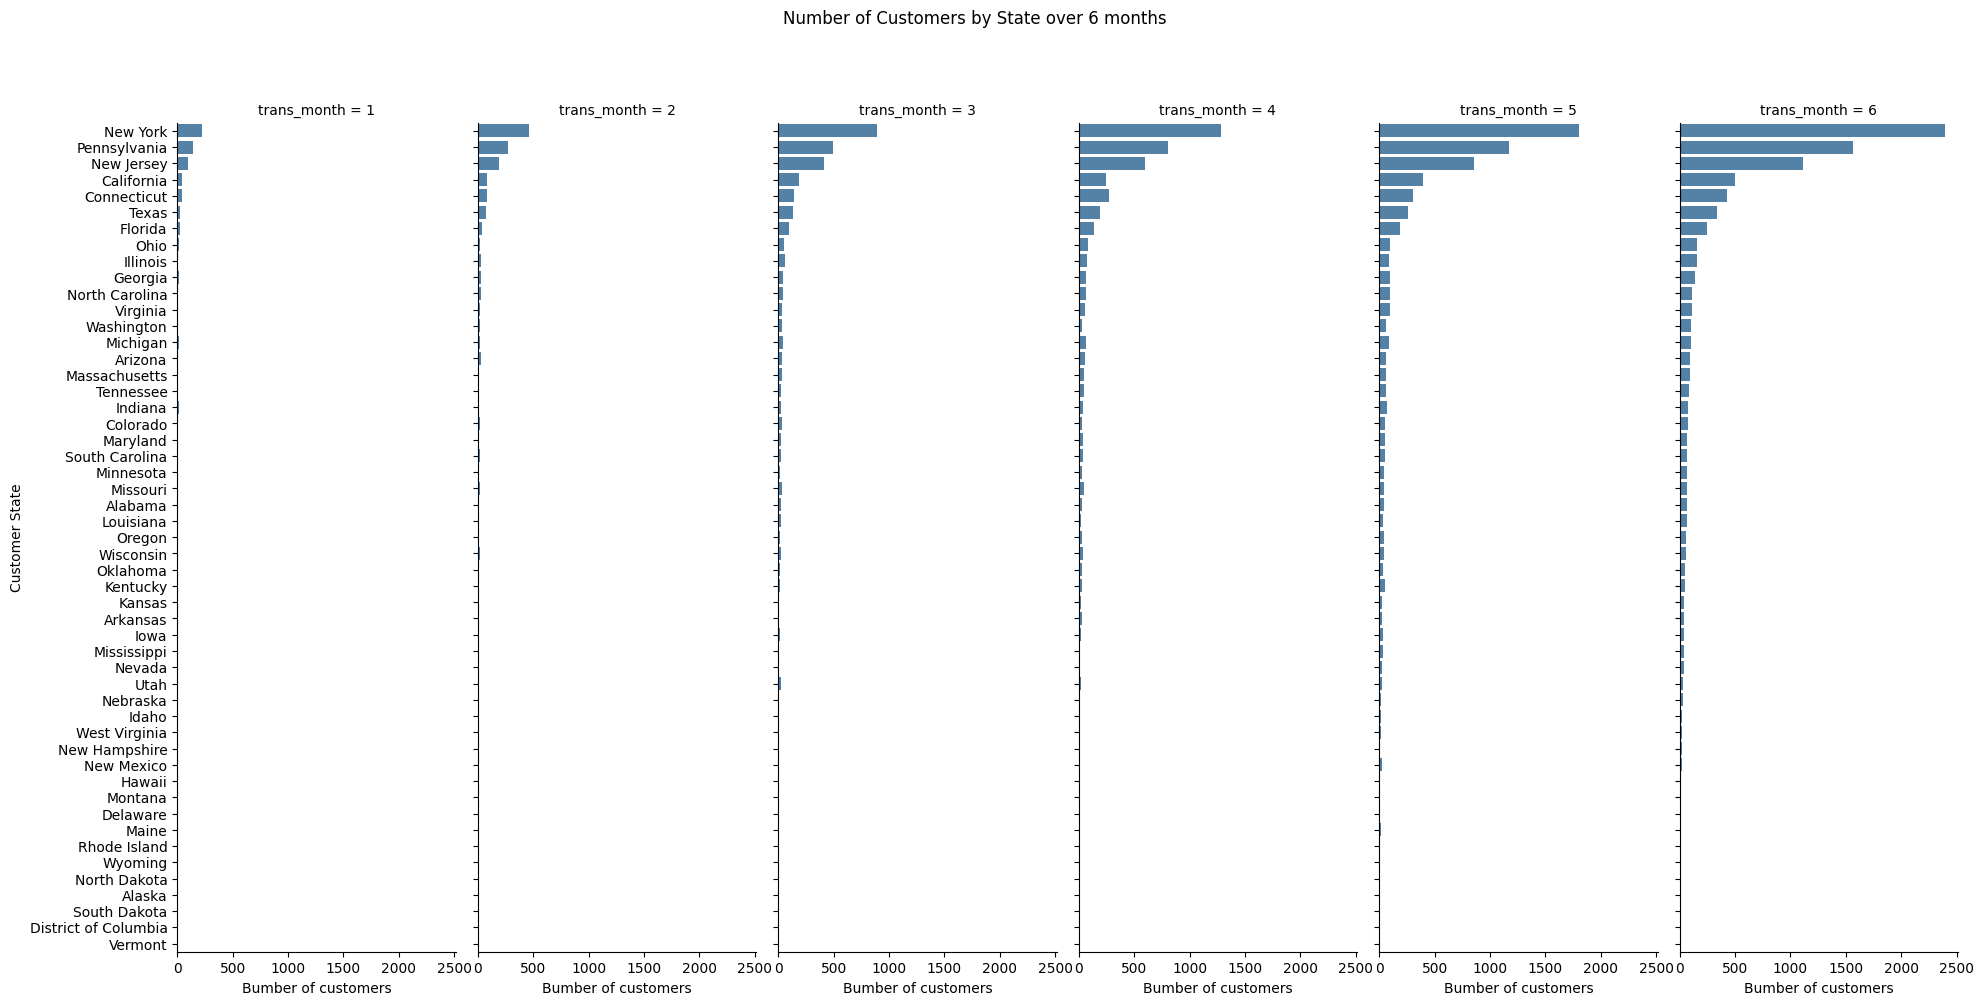

In [138]:
order_state = groupby_df.loc[groupby_df['trans_month'] == 6].sort_values(by = 'cust_id', ascending = False)['cust_state']
g = sns.FacetGrid(groupby_df, col = 'trans_month')
g.map_dataframe(sns.barplot, x = 'cust_id', y = 'cust_state', color = 'steelblue', order = order_state)
g.fig.set_size_inches(20, 12)
g.set_ylabels('Customer State')
g.set_xlabels('Bumber of customers')
g.fig.suptitle('Number of Customers by State over 6 months')

In [139]:
grouped_pivot_tb = groupby_df.pivot(index = 'cust_state', columns = 'trans_month', values = 'cust_id')
grouped_pivot_tb.sort_values(by = 6, ascending = False)

trans_month,1,2,3,4,5,6
cust_state,,,,,,
New York,220.0,466.0,895.0,1280.0,1804.0,2393.0
Pennsylvania,145.0,276.0,497.0,805.0,1171.0,1568.0
New Jersey,94.0,189.0,415.0,594.0,852.0,1115.0
California,42.0,86.0,184.0,249.0,396.0,495.0
Connecticut,44.0,82.0,140.0,270.0,306.0,424.0
Texas,26.0,75.0,136.0,189.0,259.0,333.0
Florida,23.0,39.0,99.0,135.0,186.0,248.0
Ohio,15.0,17.0,56.0,83.0,98.0,155.0
Illinois,9.0,26.0,58.0,74.0,91.0,155.0


__Summary__: As can be seen from the plot and table above, New York, Pennsyvania, New Jersey are the three top states that customer base increases the most over the 6 months.

## Customer Purchasing Behavior

Next, we want to examine the customer purchasing behavior. We will ask the following questions and try to use the data to answer it.

1. What's the average monthly purchases per customer? This can help us distinguish whether the sales increase is due to number of customer increase or customer's average spending increase or both.

In [140]:
grouped_summary = order_df.groupby(by = ['trans_month', 'cust_id'], as_index=False)['total_sales'].sum()
grouped_summary.groupby(by = 'trans_month', as_index = False)['total_sales'].mean()

,trans_month,total_sales
0,1,64.272969
1,2,59.495777
2,3,62.534009
3,4,61.286925
4,5,62.547991
5,6,61.520315


In [141]:
grouped_summary = order_df.groupby(by = ['trans_month', 'cust_state','cust_id'], as_index=False)['total_sales'].sum()
grouped_summary = grouped_summary.groupby(by = ['trans_month', 'cust_state'], as_index = False).agg({'total_sales': ['count', 'mean']})
# Only select those states with greater than or equal to 50 customers in month 6
states_gt50 = grouped_summary.loc[(grouped_summary[('total_sales', 'count')] > 50) & (grouped_summary['trans_month'] == 6), 'cust_state']
grouped_summary_gt50 = grouped_summary[grouped_summary['cust_state'].isin(states_gt50)]
grouped_summary_gt50.pivot(columns = 'trans_month', index = 'cust_state', values = ('total_sales', 'mean')).sort_values(by = 6, ascending = False)

trans_month,1,2,3,4,5,6
cust_state,,,,,,
Maryland,68.374286,93.344615,58.801724,51.077027,75.916471,74.307826
South Carolina,72.520000,61.348235,49.122143,53.035429,62.322083,71.276029
Arizona,67.091667,61.977778,52.097027,68.110000,64.944375,69.644271
Alabama,85.096250,67.410000,57.800000,62.522759,61.911364,69.431667
Colorado,80.273333,59.053125,46.931250,65.763750,59.116786,69.206528
North Carolina,57.052000,64.716875,67.524348,55.733710,64.306327,68.698938
Minnesota,44.195000,66.590000,59.290526,55.723000,68.328667,67.506176
Texas,62.110769,56.088667,60.319853,65.370952,60.096911,64.293964
New York,65.616091,57.772833,63.889006,61.974336,63.171585,63.423953


__Summary__: As can be seen from the tables above, the average monthly spending per customer does not change very much. This indicates that the growth is mainly due to the increase of customer base.

2. What's the total sales by product animal type and product category?

Text(0.5, 0, 'Months')

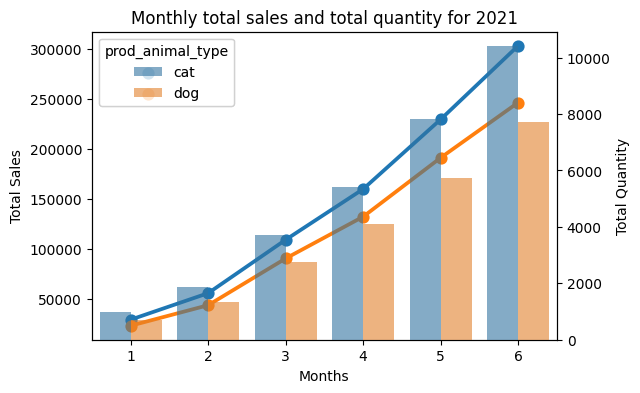

In [197]:
# Group the total sales and quantity by product animal type
grouped_df = order_df.groupby(by = ['trans_month', 'prod_animal_type'], as_index=False)
# Total sales change over the 6 months
grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
plt.figure(figsize = (6, 4))
sns.pointplot(data = grouped_sales, x = 'trans_month', y = 'total_sales', hue = 'prod_animal_type')
plt.title('Monthly total sales and total quantity for 2021')
plt.ylabel('Total Sales')
plt.xlabel('Months')
# Total quantities of item sold over the 6 months
ax2 = plt.twinx()
sns.barplot(data = grouped_sales, x = 'trans_month', y = 'trans_quantity',  hue = 'prod_animal_type', ax = ax2, alpha = 0.6)
plt.ylabel('Total Quantity')
plt.xlabel('Months')

__Summary__: As can be seen from the chart above, compared to dog, products that is for cats have larger number of item sold and higher sales over the 6 months.

In [199]:
# Group the total sales and quantity by product animal type
grouped_df = order_df.groupby(by = ['trans_month', 'prod_animal_type', 'prod_category'], as_index=False)
grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()

Text(0.5, 0.98, 'Total sales by month, animal type and product category - All states')

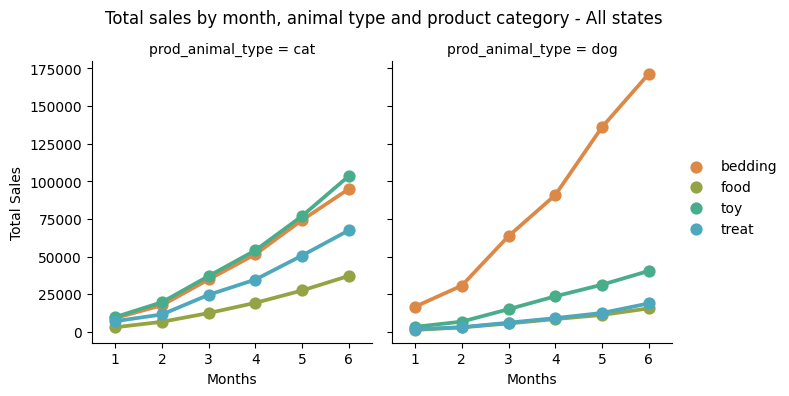

In [200]:
# Total sales change over the 6 months by product anumal type and product category
g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
g.fig.set_size_inches(7, 4)
g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'total_sales', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
g.add_legend()
g.set_ylabels('Total Sales')
g.set_xlabels('Months')
g.fig.subplots_adjust(top = 0.85)
g.fig.suptitle('Total sales by month, animal type and product category - All states')

Text(0.5, 0.98, 'Total quantity sold by month, animal type and product category - All states')

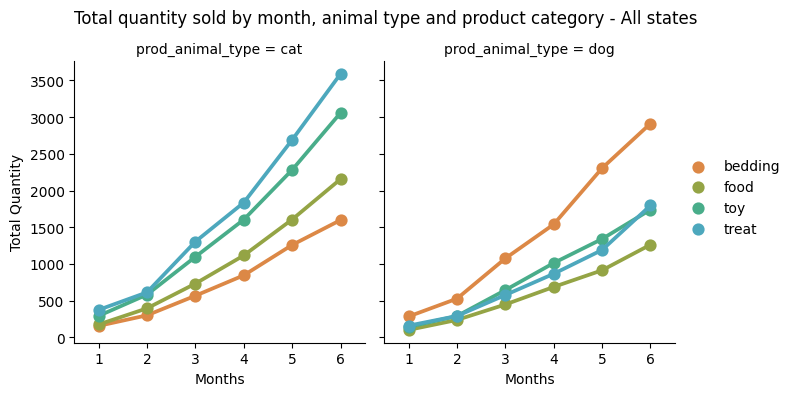

In [201]:
# Total quantity change over the 6 months by product anumal type and product category
g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
g.fig.set_size_inches(7, 4)
g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'trans_quantity', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
g.add_legend()
g.set_ylabels('Total Quantity')
g.set_xlabels('Months')
g.fig.subplots_adjust(top = 0.85)
g.fig.suptitle('Total quantity sold by month, animal type and product category - All states')

In [188]:
# What's the average product price per product animal type and product category?
order_df.groupby(['prod_animal_type', 'prod_category'])['prod_price'].mean()

prod_animal_type  prod_category
cat               bedding          59.835751
                  food             17.127809
                  toy              33.769952
                  treat            18.832678
dog               bedding          58.881233
                  food             12.296785
                  toy              23.274285
                  treat            10.489502
Name: prod_price, dtype: float64

__Summary__: If we drill down by product category, there are some interesting findings:
* Cat: 
    * In terms of quantity sold, all for categories for cats are increasing but the four categories increase rates are different. Specifically, the treat category increased the most, bedding increased the least
    * In terms of total sales, because bedding has the highest average price per item, it has similar level of increase as toys. While for food and treat, though quantity increased so much, the total sales did not increase as much because of low price per item.
* Dog: 
    * In terms of quantity sold and total sales, bedding category wins all other categories. 

By comparing cat and dog type, cat products have more quantity sold than dogs. In addition, the average price per item for cat product category is higher than dogs, it leads to more sales in cat than dog.

In [146]:
# What's the price for each product title?
order_df.groupby(['prod_animal_type', 'prod_category', 'prod_title'])['prod_price'].value_counts()

prod_animal_type  prod_category  prod_title              prod_price
cat               bedding        Cat Cave                72.99         1762
                                 Snoozer Hammock         45.99         1674
                  food           Purr Mix                12.99         1359
                                 Yum Fish-Dish           18.95         3086
                  toy            Ball and String         28.45         1379
                                 Foozy Mouse             32.99         1288
                                 Kitty Climber           35.99         2438
                                 Scratchy Post           35.98         1325
                  treat          Feline Fix Mix          19.99         2412
                                 Purrfect Puree          18.95         1795
                                 Snack-em Fish           15.99         1150
                                 Tuna Tasties            18.95         2276
dog               be

In [205]:
dog_bedding = order_df[(order_df['prod_title'] == 'Reddy Beddy')]
dog_bedding_summary_day = dog_bedding.groupby(['trans_month', 'trans_day', 'prod_price'], as_index = False)['trans_quantity'].sum()
dog_bedding_summary_day.groupby(['trans_day', 'prod_price'], as_index = False)['trans_quantity'].mean()

,trans_day,prod_price,trans_quantity
0,1,54.95,9.000000
1,1,60.99,7.333333
2,1,65.99,13.666667
3,2,54.95,7.833333
4,2,60.99,6.833333
...,...,...,...
88,30,60.99,14.600000
89,30,65.99,20.600000
90,31,54.95,11.333333
91,31,60.99,12.000000


<AxesSubplot: xlabel='trans_day', ylabel='trans_quantity'>

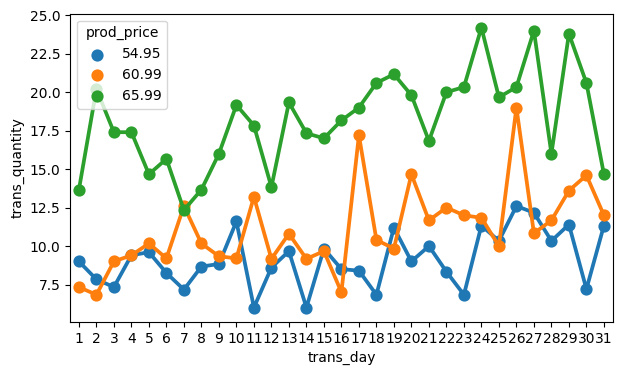

In [206]:
# Seems only Reddy Beddy has changed price. Let's drill into this product to see which month did the price change?
dog_bedding = order_df[(order_df['prod_title'] == 'Reddy Beddy')]
dog_bedding_summary_day = dog_bedding.groupby(['trans_month', 'trans_day', 'prod_price'], as_index = False)['trans_quantity'].sum()
dog_bedding_summary_day = dog_bedding_summary_day.groupby(['trans_day', 'prod_price'], as_index = False)['trans_quantity'].mean()
plt.figure(figsize = (7, 4))
sns.pointplot(data = dog_bedding_summary_day, x = 'trans_day', y = 'trans_quantity', hue = 'prod_price')

<AxesSubplot: xlabel='trans_month', ylabel='trans_quantity'>

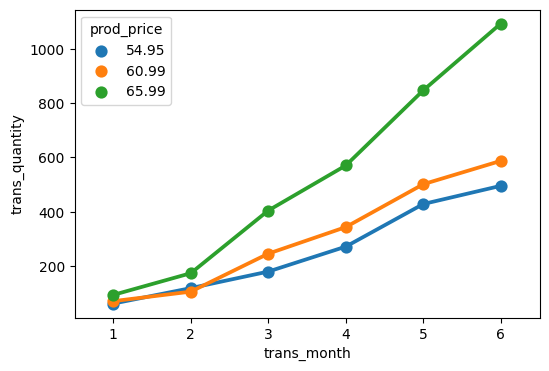

In [212]:
dog_bedding_summary_month = dog_bedding.groupby(['trans_month', 'prod_price'], as_index = False)['trans_quantity'].sum()
dog_bedding_summary_month = dog_bedding_summary_month.astype({'trans_month': 'category'})
plt.figure(figsize = (6, 4))
sns.pointplot(data = dog_bedding_summary_month, x = 'trans_month', y = 'trans_quantity', hue = 'prod_price')

__Summary__: 
It is interesting to find that all products do not change price over the 6 months exept for the 'Reddy Beddy'. So we take a deeper look at the 'Reddy Beddy' product. And it is even more interesting to see that the higher the product price, the higher quantities sold. And during a month, there's an increase trend in quantity sold from the begining towards the late of a month.

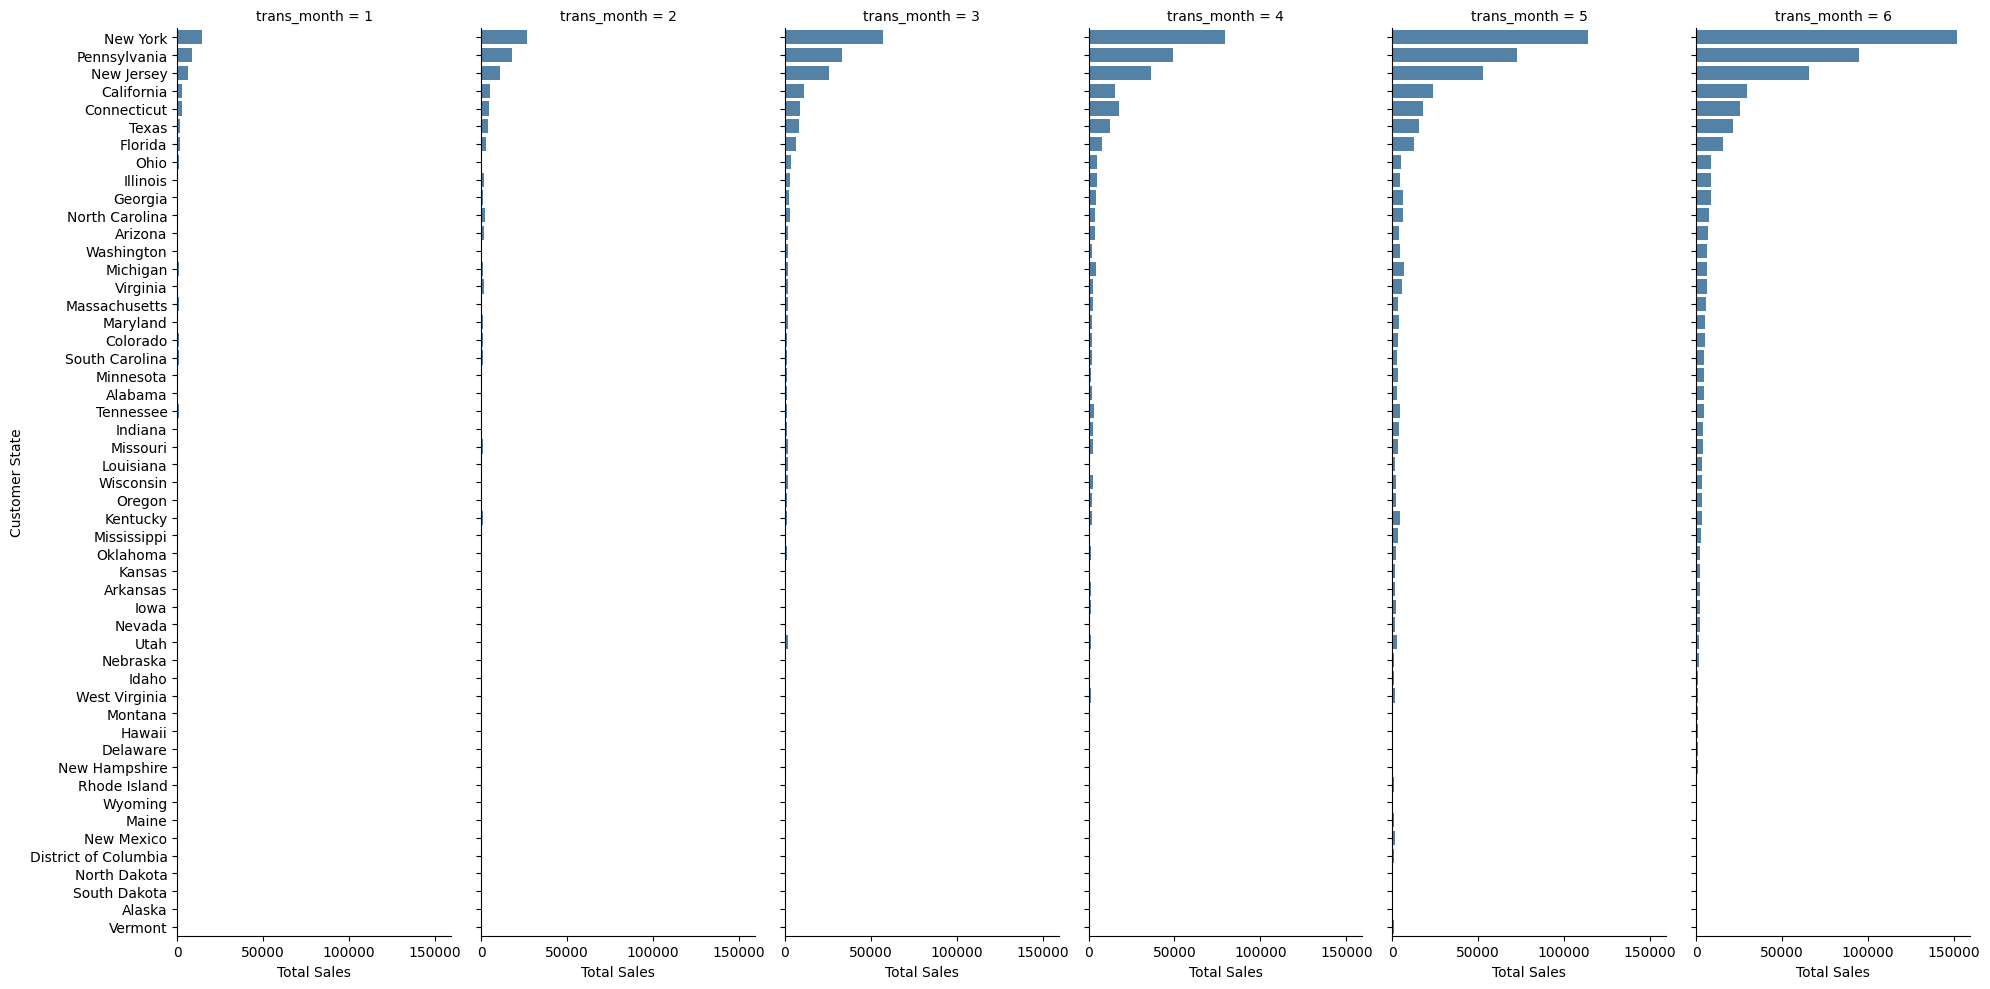

In [107]:
# User's location distribution - no difference by animal type over the 6 months
grouped_df = order_df.groupby(by = ['trans_month', 'cust_state'], as_index = False)
grouped_state_df = grouped_df[['total_sales', 'trans_quantity']].sum()
order_state = grouped_state_df.loc[grouped_state_df['trans_month'] == 6].sort_values(by = 'total_sales', ascending = False)['cust_state']
g = sns.FacetGrid(grouped_state_df, col = 'trans_month')
g.fig.set_size_inches(20, 10)
g.map_dataframe(sns.barplot, x = 'total_sales', y = 'cust_state', color = 'steelblue', order = order_state)
g.set_ylabels('Customer State')
g.set_xlabels('Total Sales')

In [109]:
# We will take a closer look at the top 3 states: New York, Pennsylvania and New Jersey
def plot_by_MA(df, cond):
    # Group the total sales and quantity by product animal type
    grouped_df = df.groupby(by = ['trans_month', 'prod_animal_type'], as_index=False)
    # Total sales change over the 6 months
    grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
    sns.pointplot(data = grouped_sales, x = 'trans_month', y = 'total_sales', hue = 'prod_animal_type')
    plt.suptitle('Total monthly sales and item quantity for 2021')
    plt.title(f'{cond}')
    plt.ylabel('Total Sales')
    plt.xlabel('Months')
    # Total quantities of item sold over the 6 months
    ax2 = plt.twinx()
    sns.barplot(data = grouped_sales, x = 'trans_month', y = 'trans_quantity',  hue = 'prod_animal_type', ax = ax2, alpha = 0.6)
    plt.ylabel('Total count')
    plt.xlabel('Months')

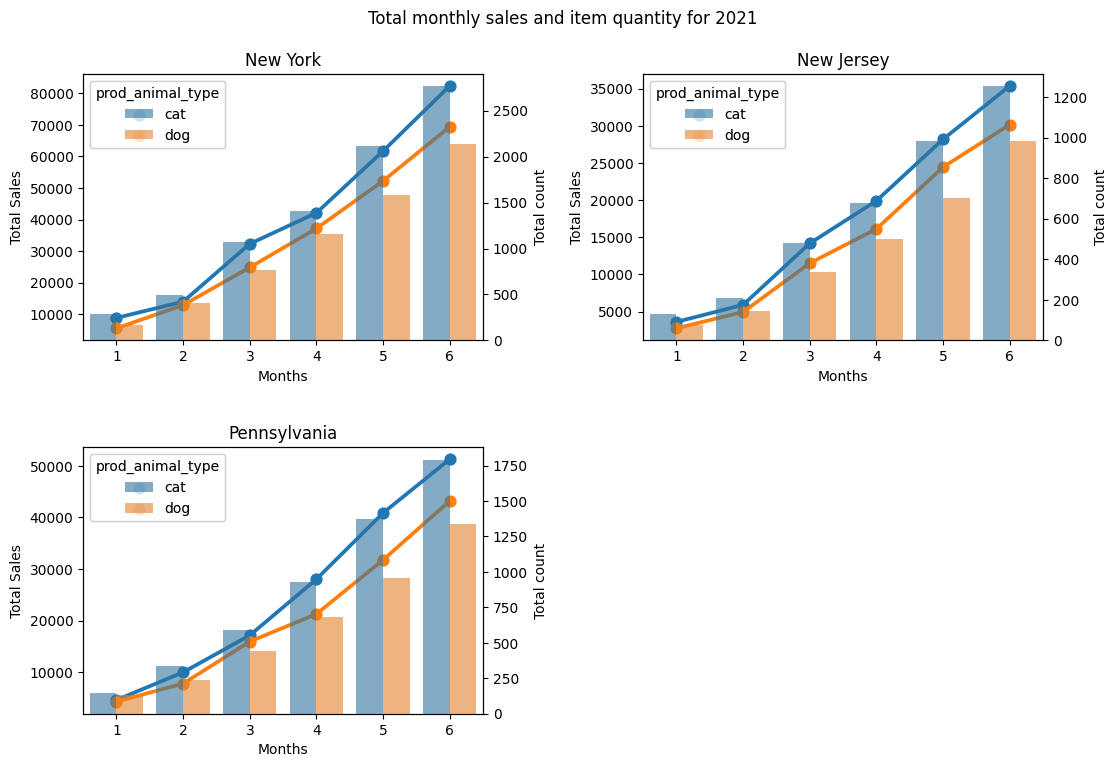

In [207]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plot_by_MA(order_df[order_df['cust_state'] == 'New York'], 'New York')
plt.subplot(2,2,2)
plot_by_MA(order_df[order_df['cust_state'] == 'New Jersey'], 'New Jersey')
plt.subplot(2,2,3)
plot_by_MA(order_df[order_df['cust_state'] == 'Pennsylvania'], 'Pennsylvania')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [210]:
def plot_by_MAC(df, cond):
    # Group the total sales and quantity by product animal type
    grouped_df = df.groupby(by = ['trans_month', 'prod_animal_type', 'prod_category'], as_index=False)
    grouped_sales = grouped_df[['total_sales', 'trans_quantity']].sum()
    # Total sales change over the 6 months by product anumal type and product category
    g = sns.FacetGrid(grouped_sales, col = "prod_animal_type")
    g.fig.set_size_inches(7, 4)
    g.map_dataframe(sns.pointplot, x = 'trans_month', y = 'total_sales', hue = 'prod_category', palette = sns.husl_palette(s=.8, h=0.1) )
    g.add_legend()
    g.set_ylabels('Total Sales')
    g.set_xlabels('Months')
    g.fig.subplots_adjust(top = 0.85)
    g.fig.suptitle(f'Total sales by month, animal type and product category - {cond}')

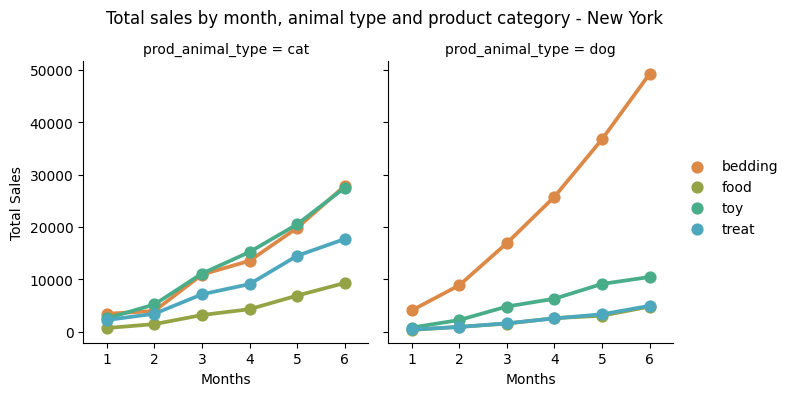

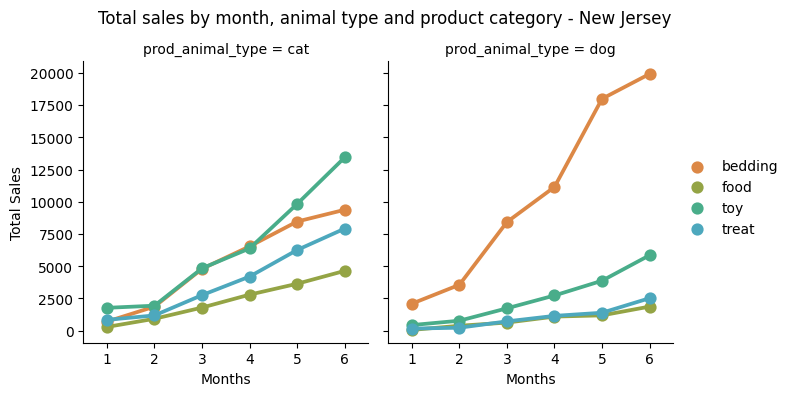

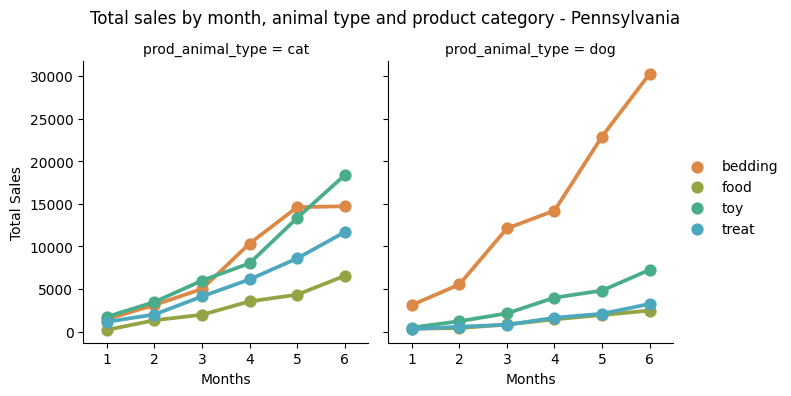

In [211]:
plot_by_MAC(order_df[order_df['cust_state'] == 'New York'], 'New York')
plot_by_MAC(order_df[order_df['cust_state'] == 'New Jersey'], 'New Jersey')
plot_by_MAC(order_df[order_df['cust_state'] == 'Pennsylvania'], 'Pennsylvania')